In [72]:
import cv2
import csv
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt

In [73]:
lines = []
with open("./data2/data/driving_log.csv") as dl:
    reader = csv.reader(dl)
    for line in reader:
        lines.append(line)

In [74]:
lines = lines[1:]

In [76]:
corr = 0.2

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


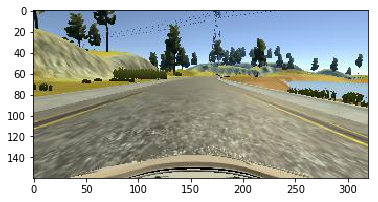

In [77]:
image = ndimage.imread("./data2/data/" + lines[500][0])
plt.imshow(image)

In [78]:
source_path = "./data2/data/"
images = []
measurements = []
for line in lines:
    m_list = []
    m = float(line[3])
    m_list = [m, m+corr, m-corr]
    for i in range(3):
        try:
            image = ndimage.imread(source_path + line[i])
            images.append(image)
            measurements.append(m_list[i])
        except Exception as e:
            continue

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


In [5]:
aug_images = []
aug_measure = []

In [6]:
for image, measurement in zip(images, measurements):
    aug_images.append(image)
    aug_measure.append(measurement)
    aug_images.append(np.fliplr(image))
    aug_measure.append(-1.0*measurement)

In [79]:
# X_train = np.array(images)
# y_train = np.array(measurements)

In [7]:
X_train = np.array(aug_images)
y_train = np.array(aug_measure)

In [80]:
import tensorflow as tf

In [81]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Lambda, Cropping2D, Conv2D, Cropping3D

In [82]:
model = Sequential()
model.add(Cropping2D(cropping=((60,20),(0,0)),input_shape = (160,320,3)))
model.add(Lambda(lambda x:x/255.0 - 0.5))
model.add(Conv2D(24, (5,5),strides=(2,2),activation='relu'))
model.add(Conv2D(36, (5,5),strides=(2,2),activation='relu'))
model.add(Conv2D(48, (5,5),strides=(2,2),activation='relu'))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10))
model.add(Dense(1))

In [1]:
model.compile(optimizer='adam', loss = 'mse')
model.fit(X_train, y_train, validation_split=0.2,shuffle=True, epochs=5)

In [40]:
model.save('model.h5')